# Problem 1

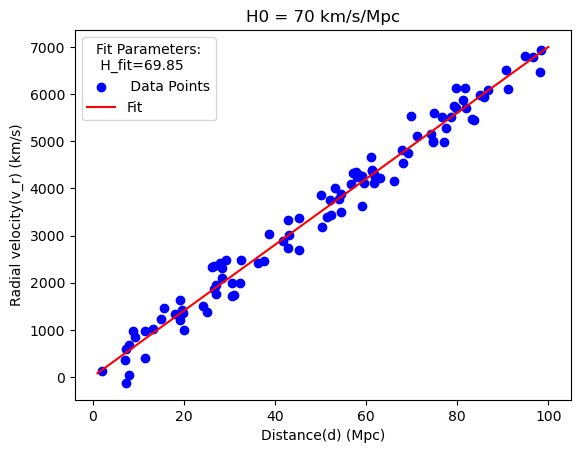

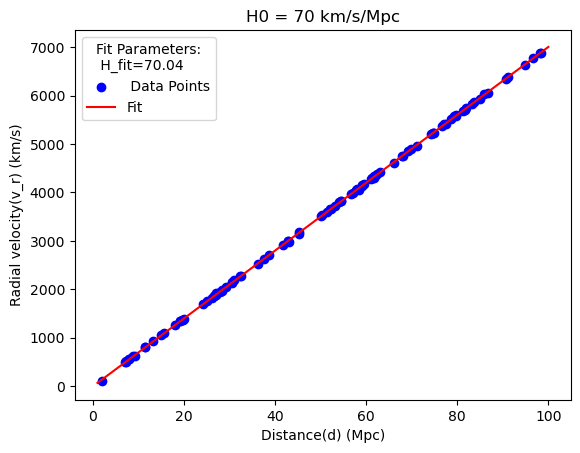

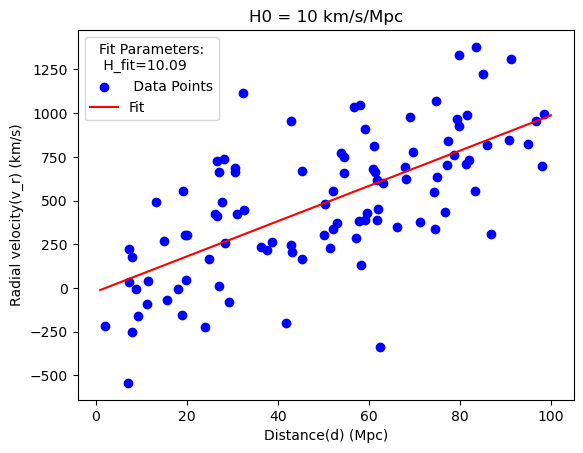

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the parameters
H0 = [70, 70, 10]  # km/s/Mpc
sigma = [300, 10, 300]  # km/s
n_galaxies = 100
d_min, d_max = 1, 100  # Mpc
d = np.random.uniform(d_min, d_max, n_galaxies)  # Drawing the distances from uniform distribution

def func(z,H,c):
    return (z*H+c)

# Simulate the data for each scenario
v_r = []
y=[]
for i in range(len(H0)):
    # Draw the peculiar velocities
    v_p = np.random.normal(0, sigma[i], n_galaxies)   # peculiar velocity from gaussian distribution
    v_r.append(H0[i]*d+v_p)
    z=np.linspace(1,100,n_galaxies)
    y=np.asarray(v_r)
    popt, pcov = curve_fit(func,d,v_r[i])

    # Plot the results
    plt.figure()
    plt.scatter(d,v_r[i],color='blue',label=' Data Points')
    plt.plot(z, func(z, *popt),color='red', label='Fit')
    plt.xlabel('Distance(d) (Mpc)')
    plt.ylabel('Radial velocity(v_r) (km/s)')
    plt.title(f'H0 = {H0[i]} km/s/Mpc')
    plt.legend(loc='upper left', title='Fit Parameters:\n H_fit={:.2f}'.format(popt[0]))
    plt.savefig('problem1_for_i={:.2f}.png'.format(i))
    plt.show()

# PROBLEM 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import odeint

# Parameters of Lambda-CDM are:

H0=70
Om_0=float(input("Enter the value of Matter-density:  "))
Od_0=1-Om_0
Or_0=9e-5
Tcmb=2.7255
w_m=0
w_r=1/3
w_de= float(input("Enter the value of w_de"))

a_mr=Or_0/Om_0;
a_md=(Od_0/Om_0)**(1/(3*w_de))
a_rd=(Od_0/Or_0)**(1/(4*w_de))

z_mr=1/a_mr-1   # Redshift at which matter-radiation equality occurs
z_md=1/a_md-1   # Redshift at which matter-dark-energy equality occurs
z_rd=1/a_rd-1   # Redshift at which radiation-dark-energy equality occurs
print("Matter-Radiation equality occurs at z=",z_mr)
print("Matter-Dark_Energy equality occurs at z=",z_md)
print("Radiation_Dark-Energy  equality occurs at z=",z_rd)

# PROBLEM  3

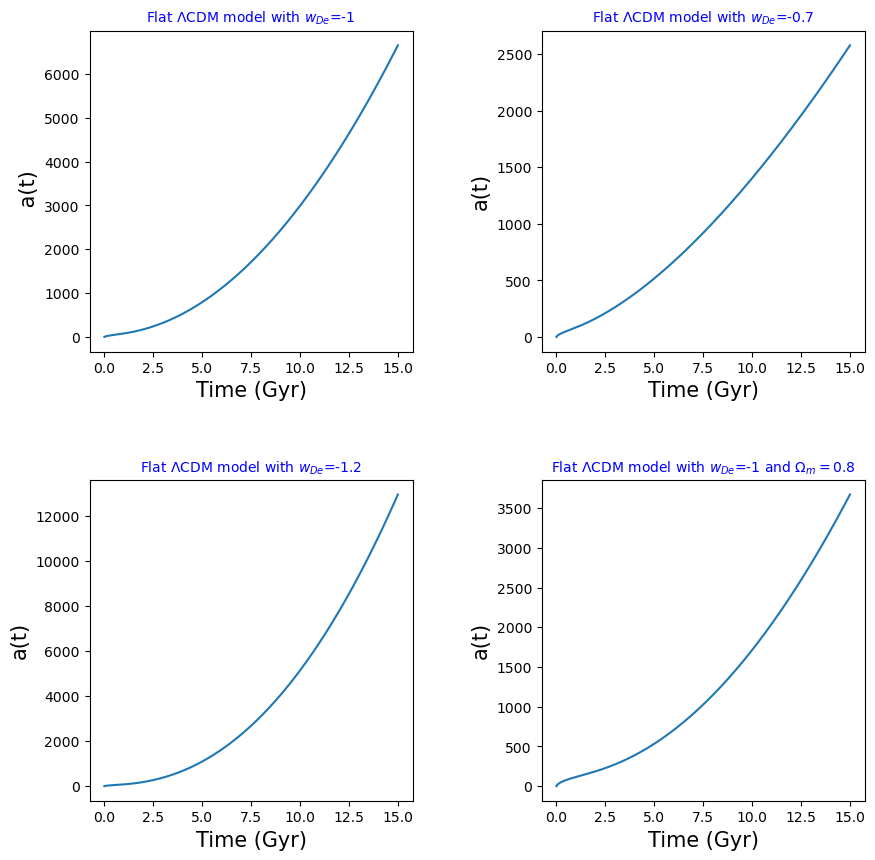

In [1]:
import numpy as np
from scipy.integrate import odeint
import pylab as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# Constants
H0 = 70 # km/s/Mpc, present value of Hubble parameter
Om0 = 0.3 # present-day density parameter for matter
Ol0 = 0.7 # present-day density parameter for dark energy
def func(da,a):
    return H0 * np.sqrt(Om0/a + Ol0*a**2)
# Initial condition: a(t0) = 1, where t0 is the present time
a0 = 1
# Time array: from present time to 15 billion years ago, in units of Gyr
t = np.linspace(0.01, 15, 1000)
a = odeint(func, a0, t)
ax1.plot(t,a)
ax1.set_xlabel('Time (Gyr)',size=15,color='k')
ax1.set_ylabel(' a(t)',size=15,color='k')
ax1.set_title(r'Flat ΛCDM model with $w_{De}$=-1',size=10,color='b')

def func(da,a):
    return H0 * np.sqrt(Om0/a + Ol0*a**1.1)
# Initial condition: a(t0) = 1, where t0 is the present time
a0 = 1
# Time array: from present time to 15 billion years ago, in units of Gyr
t = np.linspace(0.01, 15, 1000)
a = odeint(func, a0, t)
ax2.plot(t,a)
ax2.set_xlabel('Time (Gyr)',size=15,color='k')
ax2.set_ylabel('a(t)',size=15,color='k')
ax2.set_title(r'Flat ΛCDM model with $w_{De}$=-0.7',size=10,color='b')


def func(da,a):
    return H0 * np.sqrt(Om0/a + Ol0*a**2.6)
# Initial condition: a(t0) = 1, where t0 is the present time
a0 = 1
# Time array: from present time to 15 billion years ago, in units of Gyr
t = np.linspace(0.01, 15, 1000)
a = odeint(func, a0, t)
ax3.plot(t,a)
ax3.set_xlabel('Time (Gyr)',size=15,color='k')
ax3.set_ylabel('a(t)',size=15,color='k')
ax3.set_title(r'Flat ΛCDM model with $w_{De}$=-1.2',size=10,color='b')


H0 = 70 # km/s/Mpc, present value of Hubble parameter
Om0 = 0.8 # present-day density parameter for matter
Ol0 = 0.2 # present-day density parameter for dark energy
def func(da,a):
    return H0 * np.sqrt(Om0/a + Ol0*a**2)
# Initial condition: a(t0) = 1, where t0 is the present time
a0 = 1
# Time array: from present time to 15 billion years ago, in units of Gyr
t = np.linspace(0.01, 15, 1000)
a = odeint(func, a0, t)
ax4.plot(t,a)
ax4.set_xlabel('Time (Gyr)',size=15,color='k')
ax4.set_ylabel('a(t)',size=15,color='k')
ax4.set_title(r'Flat ΛCDM model with $w_{De}$=-1 and $\Omega_m=0.8$',size=10,color='b')

plt.subplots_adjust(hspace=0.4, wspace=0.4)

# display the plots

plt.show()


# LOOKBACK TIME(PROBLEM 6)

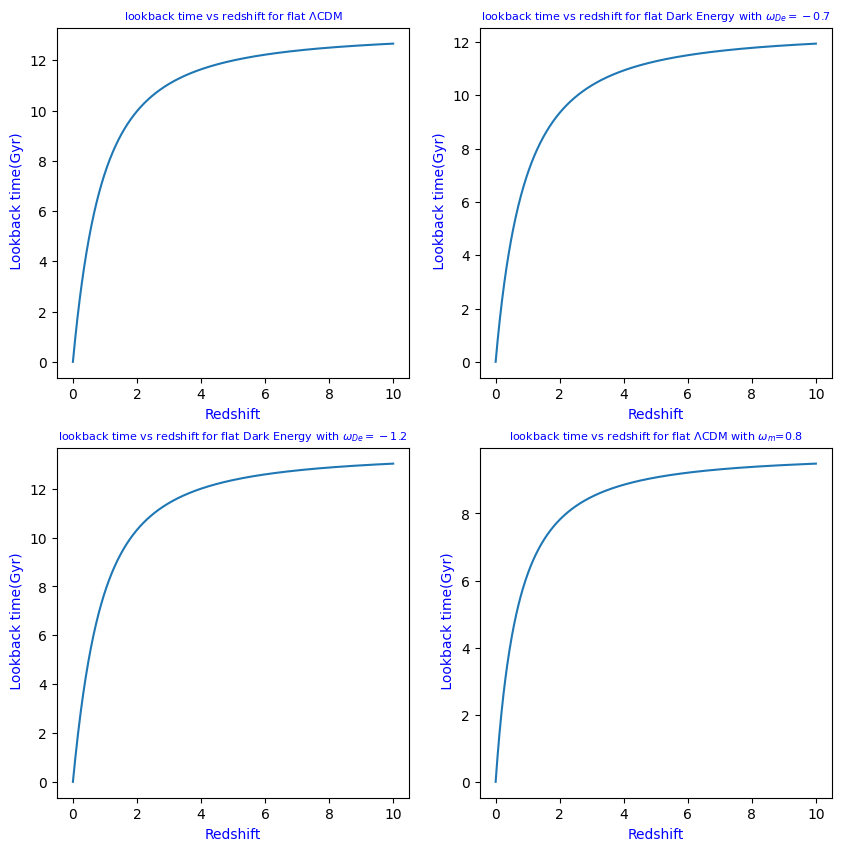

In [50]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define the cosmological parameters
H0 = 2.33*10**(-18) #sec^-1 1 gyr=3.1536*10^16 sec
H0=2.33*10**(-18)*(3.1536*10**16) #in Gyr^-1
Omega_M = 0.3                 
Omega_L = 0.7                 
# Calculate the lookback time as a function of redshift for flat lambda cdm
def lookbacktime(z):
    integral,error = quad(lambda z: 1 / (1 + z) / np.sqrt(Omega_M * (1 + z) ** 3 + Omega_L)/H0 , 0,z)#we integrate from the point zd
    return integral
# Create the plot
A1=[]
Z = np.linspace(0, 10, 1000)
for i in range(len(Z)):
    A1.append(lookbacktime(Z[i]))

ax1.plot(Z,A1)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel(' Lookback time(Gyr)',size=10,color='b')
ax1.set_title("lookback time vs redshift for flat $\Lambda$CDM",color='b',size=8)


# Calculate the lookback time as a function of redshift for flat Dark Energy with wde=-0.7
def lookbacktime(z):
    integral,error = quad(lambda z: 1 / (1 + z) / np.sqrt(Omega_M * (1 + z) ** 3 + Omega_L*(1+z)**0.9)/H0 , 0,z)#we integrate from the point zd
    return integral
# Create the plot
A1=[]
Z = np.linspace(0, 10, 1000)
for i in range(len(Z)):
    A1.append(lookbacktime(Z[i]))

ax2.plot(Z,A1)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel(' Lookback time(Gyr)',size=10,color='b')
ax2.set_title("lookback time vs redshift for flat Dark Energy with $\omega_{De}=-0.7$",color='b',size=8)

# Calculate the lookback time as a function of redshift for flat Dark Energy with wde=-1.2
def lookbacktime(z):
    integral,error = quad(lambda z: 1 / (1 + z) / np.sqrt(Omega_M * (1 + z) ** 3 + Omega_L*(1+z)**(-0.6))/H0 , 0,z)#we integrate from the point zd
    return integral
# Create the plot
A1=[]
Z = np.linspace(0, 10, 1000)
for i in range(len(Z)):
    A1.append(lookbacktime(Z[i]))

ax3.plot(Z,A1)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel(' Lookback time(Gyr)',size=10,color='b')
ax3.set_title("lookback time vs redshift for flat Dark Energy with $\omega_{De}=-1.2$",color='b',size=8)

# Calculate the lookback time as a function of redshift for flat lambda cdm with  omegam=0.8
def lookbacktime(z):
    integral,error = quad(lambda z: 1 / (1 + z) / np.sqrt(0.8 * (1 + z) ** 3 + 0.2)/H0 , 0,z)#we integrate from the point zd
    return integral
# Create the plot
A1=[]
Z = np.linspace(0, 10, 1000)
for i in range(len(Z)):
    A1.append(lookbacktime(Z[i]))

ax4.plot(Z,A1)
ax4.set_xlabel('Redshift',size=10,color='b')
ax4.set_ylabel(' Lookback time(Gyr)',size=10,color='b')
ax4.set_title("lookback time vs redshift for flat $\Lambda$CDM with $\omega_m$=0.8",color='b',size=8)
plt.show()


# COMOVING DISTANCE (PROBLEM 8b)

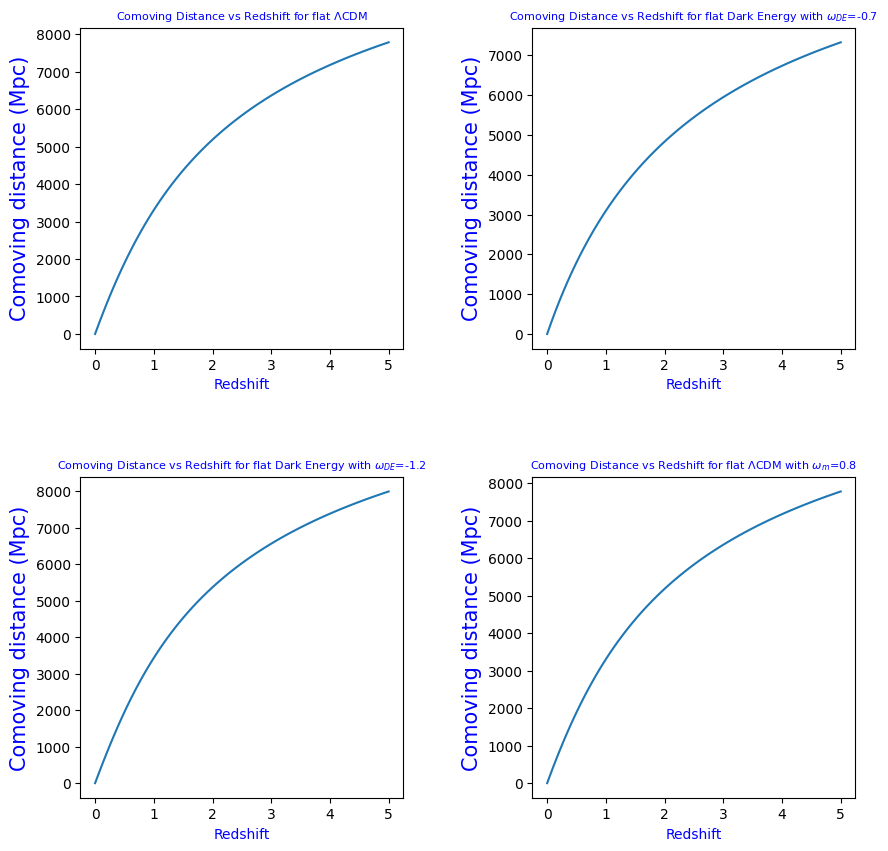

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# Define cosmological parameters
H0 = 70 # Hubble constant in km/s/Mpc
omega_m = 0.3 # Matter density parameter
omega_l = 0.7 # Dark energy density parameter
c=3*10**5
# Define the redshift range
z = np.linspace(0, 5, 100)

# comoving distance for flat Lambda CDM
def comoving_distance(z):
    return c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,0,z)[0])

A=[]
for i in range(len(z)):
    A.append(comoving_distance(z[i]))
ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel('Comoving distance (Mpc)',size=15,color='b')
ax1.set_title("Comoving Distance vs Redshift for flat $\Lambda$CDM",color='b',size=8)

# comoving distance for flat Dark Matter with wde=-0.7 
def comoving_distance(z):
    return c/H0*(quad(lambda z:1 /np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**0.9) ,0,z)[0])
A=[]
for i in range(len(z)):
    A.append(comoving_distance(z[i]))
ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel('Comoving distance (Mpc)',size=15,color='b')
ax2.set_title("Comoving Distance vs Redshift for flat Dark Energy with $\omega_{DE}$=-0.7",color='b',size=8)

# comoving distance for flat Dark Matter with wde=-1.2
def comoving_distance(z):
    return c/H0*(quad(lambda z:1 /np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**(-0.6)) ,0,z)[0])
A=[]
for i in range(len(z)):
    A.append(comoving_distance(z[i]))
ax3.plot(z,A)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel('Comoving distance (Mpc)',size=15,color='b')
ax3.set_title("Comoving Distance vs Redshift for flat Dark Energy with $\omega_{DE}$=-1.2",color='b',size=8)

# comoving distance for flat Lambda CDM  with omegam=0.8
def comoving_distance(z):
    return c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,0,z)[0])

A=[]
for i in range(len(z)):
    A.append(comoving_distance(z[i]))
ax4.plot(z,A)
ax4.set_xlabel('Redshift',size=10,color='b')
ax4.set_ylabel('Comoving distance (Mpc)',size=15,color='b')
ax4.set_title("Comoving Distance vs Redshift for flat $\Lambda$CDM with $\omega_m$=0.8",color='b',size=8)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()




# ANGULAR DIAMETER DISTANCE(PROBLEM 8C)

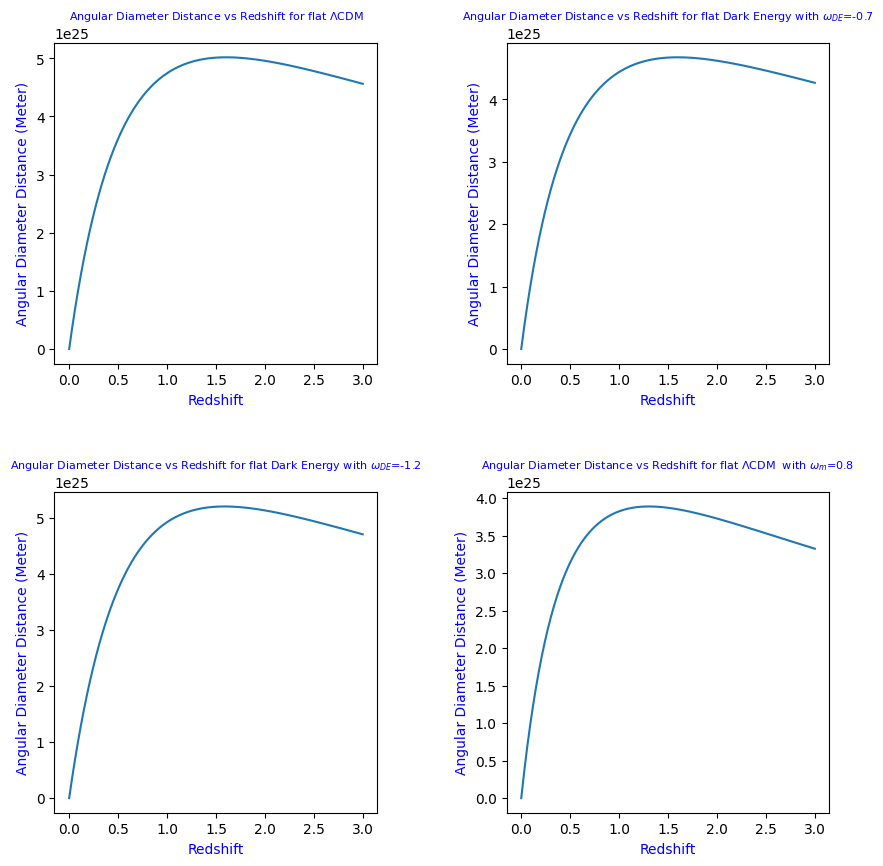

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
#DEFINING CONSTANT
H0=2.44*10**(-18)  #hubble constant in sec^-1
Omega_M = 0.3                 
Omega_L = 0.7    
c=3*10**8 
rs=147*3.086*10**22 #147 Mpc in meter
# ANGULAR DIAMETER DISTANCE  FOR FLAT LAMBDA CDM           
def l(z):
    integral,error = quad(lambda z: 1 / np.sqrt(Omega_M * (1 + z) ** 3 + Omega_L)/H0 , 0,z)#we integrate from the point zd
    return integral
def luminositydist(z):
    return c*(1+z)*l(z)
def angulardiadist(z):
    return luminositydist(z)/(1+z)**2
# Plot the comoving distance vs redshift
A=[]
z=np.linspace(0,3,100)
for i in range(len(z)):
    A.append(angulardiadist(z[i]))

ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel('Angular Diameter Distance (Meter)',size=10,color='b')
ax1.set_title("Angular Diameter Distance vs Redshift for flat $\Lambda$CDM",color='b',size=8)

# ANGULAR DIAMETER DISTANCE  FOR FLAT flat Dark Matter with wde=-0.7          
def l(z):
    integral,error = quad(lambda z: 1 / np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**0.9)/H0 , 0,z)#we integrate from the point zd
    return integral
def luminositydist(z):
    return c*(1+z)*l(z)
def angulardiadist(z):
    return luminositydist(z)/(1+z)**2
# Plot the comoving distance vs redshift
A=[]
z=np.linspace(0,3,100)
for i in range(len(z)):
    A.append(angulardiadist(z[i]))

ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel('Angular Diameter Distance (Meter)',size=10,color='b')
ax2.set_title("Angular Diameter Distance vs Redshift for flat Dark Energy with $\omega_{DE}$=-0.7",color='b',size=8)


# ANGULAR DIAMETER DISTANCE  FOR FLAT flat Dark Matter with wde=-1.2          
def l(z):
    integral,error = quad(lambda z: 1 / np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**(-0.6))/H0 , 0,z)#we integrate from the point zd
    return integral
def luminositydist(z):
    return c*(1+z)*l(z)
def angulardiadist(z):
    return luminositydist(z)/(1+z)**2
# Plot the comoving distance vs redshift
A=[]
z=np.linspace(0,3,100)
for i in range(len(z)):
    A.append(angulardiadist(z[i]))

ax3.plot(z,A)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel('Angular Diameter Distance (Meter)',size=10,color='b')
ax3.set_title("Angular Diameter Distance vs Redshift for flat Dark Energy with $\omega_{DE}$=-1.2",color='b',size=8)


# ANGULAR DIAMETER DISTANCE  FOR FLAT LAMBDA CDM with omegam=0.8         
def l(z):
    integral,error = quad(lambda z: 1 / np.sqrt(0.8* (1 + z) ** 3 + 0.2)/H0 , 0,z)#we integrate from the point zd
    return integral
def luminositydist(z):
    return c*(1+z)*l(z)
def angulardiadist(z):
    return luminositydist(z)/(1+z)**2
# Plot the comoving distance vs redshift
A=[]
z=np.linspace(0,3,100)
for i in range(len(z)):
    A.append(angulardiadist(z[i]))

ax4.plot(z,A)
ax4.set_xlabel('Redshift',size=10,color='b')
ax4.set_ylabel('Angular Diameter Distance (Meter)',size=10,color='b')
ax4.set_title("Angular Diameter Distance vs Redshift for flat $\Lambda$CDM  with $\omega_m$=0.8",color='b',size=8)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()
    


# LUMINOSITY DISTANCE (PROBLEM 8A)

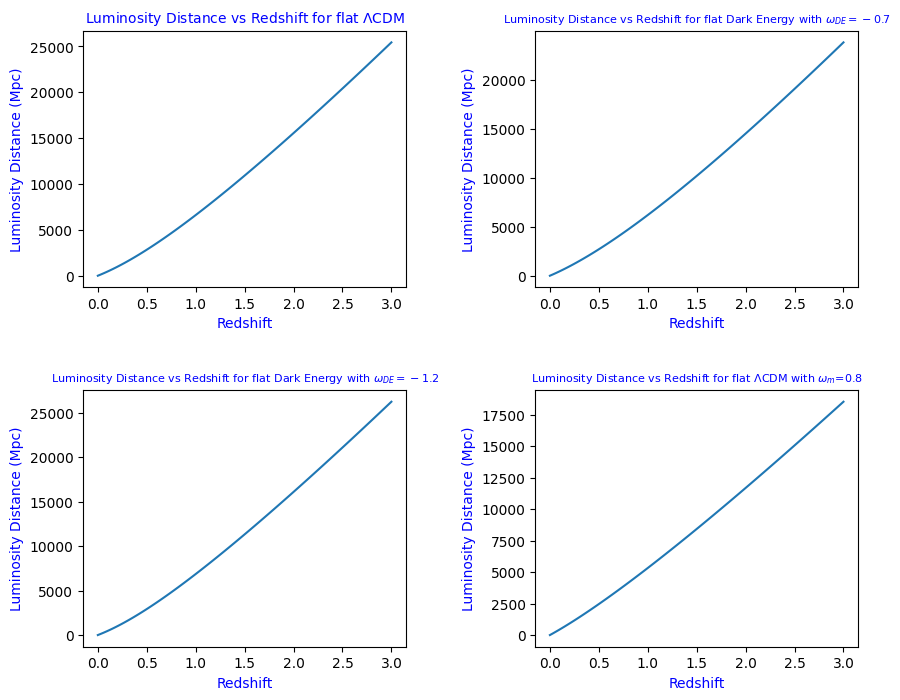

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Define cosmological parameters
H0 = 70 # Hubble constant in km/s/Mpc
omega_m = 0.3 # Matter density parameter
omega_l = 0.7 # Dark energy density parameter
c=3*10**5
# Define the redshift range
z = np.linspace(0, 3, 100)

# Calculate the Luminosity distance for flat lambda CDM
def luminosity_distance(z):
    return c/H0*(1+z)*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,0,z)[0])

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(luminosity_distance(z[i]))

ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel('Luminosity Distance (Mpc)',size=10,color='b')
ax1.set_title("Luminosity Distance vs Redshift for flat $\Lambda$CDM",color='b',size=10)

# Calculate the Luminosity distance for flat dark energy with   wde=-0.7
def luminosity_distance(z):
    return c/H0*(1+z)*(quad(lambda z:1 / np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**0.9) ,0,z)[0])

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(luminosity_distance(z[i]))

ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel('Luminosity Distance (Mpc)',size=10,color='b')
ax2.set_title("Luminosity Distance vs Redshift for flat Dark Energy with $\omega_{DE}=-0.7$",color='b',size=8)

# Calculate the Luminosity distance for flat dark energy with   wde=-1.2
def luminosity_distance(z):
    return c/H0*(1+z)*(quad(lambda z:1 / np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**(-0.6)) ,0,z)[0])

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(luminosity_distance(z[i]))

ax3.plot(z,A)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel('Luminosity Distance (Mpc)',size=10,color='b')
ax3.set_title("Luminosity Distance vs Redshift for flat Dark Energy with $\omega_{DE}=-1.2$",color='b',size=8)


# Calculate the Luminosity distance for flat lambda CDM with omegam=0.8
def luminosity_distance(z):
    return c/H0*(1+z)*(quad(lambda z:1 / np.sqrt(0.8*(1+z)**3 + 0.2) ,0,z)[0])

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(luminosity_distance(z[i]))

ax4.plot(z,A)
ax4.set_xlabel('Redshift',size=10,color='b')
ax4.set_ylabel('Luminosity Distance (Mpc)',size=10,color='b')
ax4.set_title("Luminosity Distance vs Redshift for flat $\Lambda$CDM with $\omega_m$=0.8",color='b',size=8)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()




# COMOVING VOLUME (PROBLEM 9a)

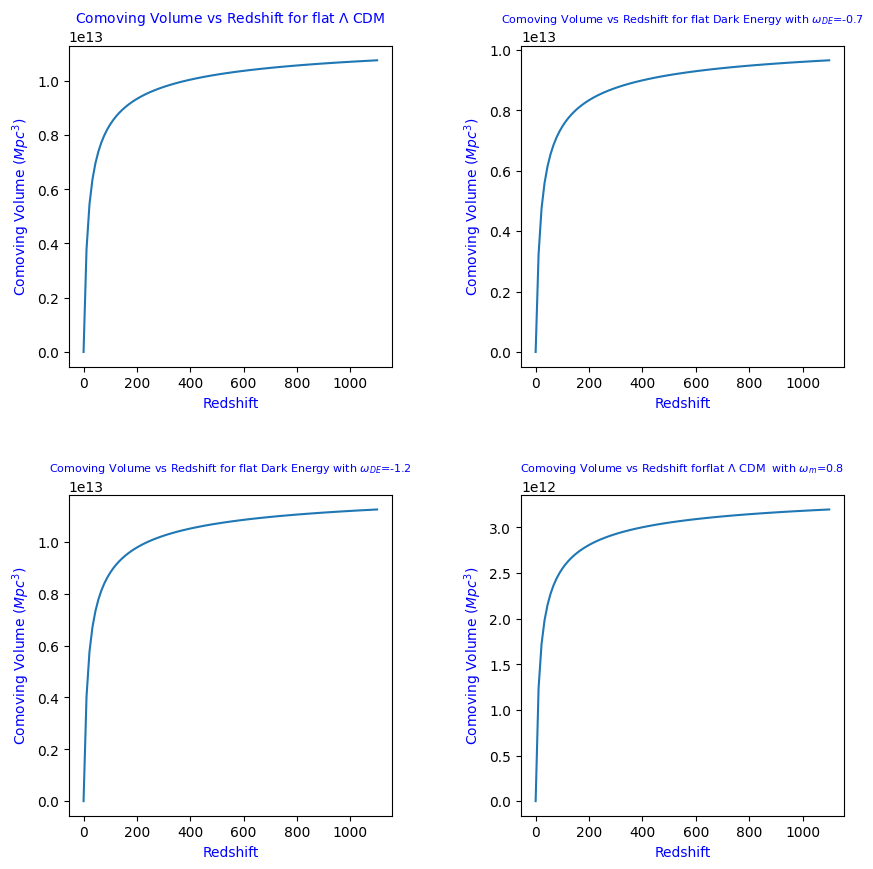

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define cosmological parameters
H0 = 70 # Hubble constant in km/s/Mpc
omega_m = 0.3 # Matter density parameter
omega_l = 0.7 # Dark energy density parameter
c=3*10**5
# Define the redshift range
z = np.linspace(0, 1100, 100)

# Calculate the comoving Volume for flat lambda  CDM 
def comoving_volume(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,0,z)[0]))**3*4/3*np.pi

# Plot the comoving volume vs redshift
A=[]
for i in range(len(z)):
    A.append(comoving_volume(z[i]))

ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel('Comoving Volume $(Mpc^3)$',size=10,color='b')
ax1.set_title("Comoving Volume vs Redshift for flat $\Lambda$ CDM",color='b',size=10)

# Calculate the comoving Volume for flat Dark matter with wde=-0.7
def comoving_volume(z):
    return (c/H0*(quad(lambda z:1 /np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**0.9) ,0,z)[0]))**3*4/3*np.pi

# Plot the comoving volume vs redshift
A=[]
for i in range(len(z)):
    A.append(comoving_volume(z[i]))

ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel('Comoving Volume $(Mpc^3)$',size=10,color='b')
ax2.set_title("Comoving Volume vs Redshift for flat Dark Energy with $\omega_{DE}$=-0.7",color='b',size=8)


# Calculate the comoving Volume for flat Dark matter with wde=-1.2
def comoving_volume(z):
    return (c/H0*(quad(lambda z:1 /np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**(-0.6)) ,0,z)[0]))**3*4/3*np.pi

# Plot the comoving volume vs redshift
A=[]
for i in range(len(z)):
    A.append(comoving_volume(z[i]))

ax3.plot(z,A)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel('Comoving Volume $(Mpc^3)$',size=10,color='b')
ax3.set_title("Comoving Volume vs Redshift for flat Dark Energy with $\omega_{DE}$=-1.2",color='b',size=8)


# Calculate the comoving Volume for flat lambda  CDM  with $\omega_m$=0.8
def comoving_volume(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(0.8*(1+z)**3 + 0.2) ,0,z)[0]))**3*4/3*np.pi

# Plot the comoving volume vs redshift
A=[]
for i in range(len(z)):
    A.append(comoving_volume(z[i]))

ax4.plot(z,A)
ax4.set_xlabel('Redshift',size=10,color='b')
ax4.set_ylabel('Comoving Volume $(Mpc^3)$',size=10,color='b')
ax4.set_title("Comoving Volume vs Redshift forflat $\Lambda$ CDM  with $\omega_m$=0.8",color='b',size=8)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()



# proper volume (PROBLEM 9b)

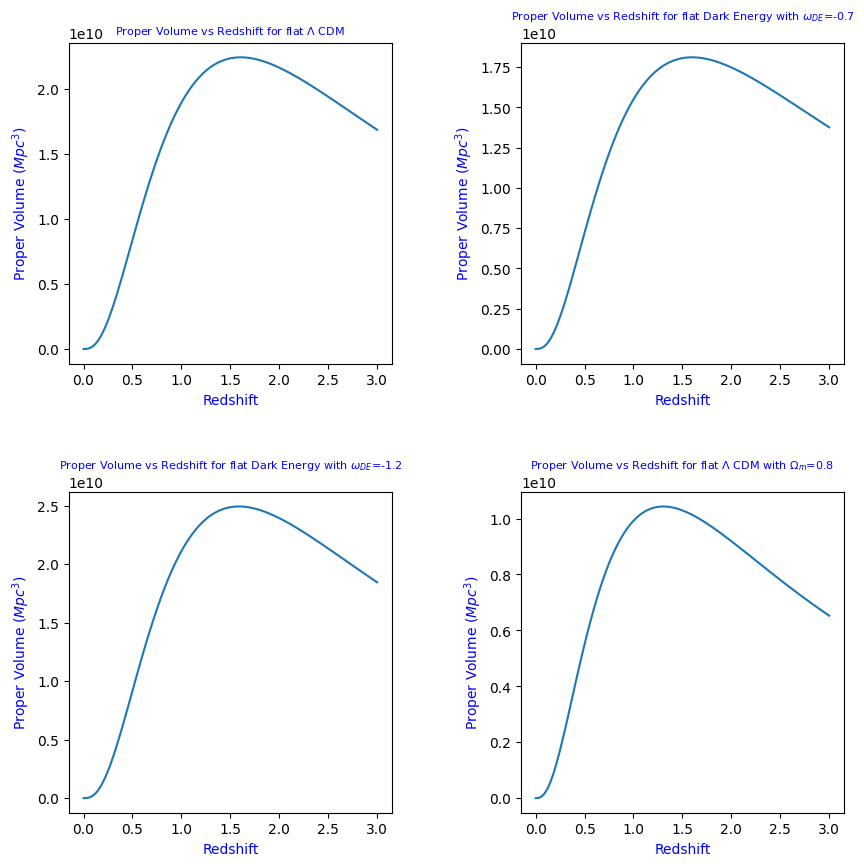

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define cosmological parameters
H0 = 70 # Hubble constant in km/s/Mpc
omega_m = 0.3 # Matter density parameter
omega_l = 0.7 # Dark energy density parameter
c=3*10**5
# Define the redshift range
z = np.linspace(0, 3, 100)

# Calculate the proper volume for flat lambda  CDM 
def proper_volume(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,0,z)[0]))**3*4/3*np.pi*(1+z)**(-3)

A=[]
for i in range(len(z)):
    A.append(proper_volume(z[i]))

ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel('Proper Volume $(Mpc^3)$',size=10,color='b')
ax1.set_title("Proper Volume vs Redshift for flat $\Lambda$ CDM",color='b',size=8)

# Calculate the proper volume for flat dark energy with wde=-0.7 
def proper_volume(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**0.9) ,0,z)[0]))**3*4/3*np.pi*(1+z)**(-3)

A=[]
for i in range(len(z)):
    A.append(proper_volume(z[i]))

ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel('Proper Volume $(Mpc^3)$',size=10,color='b')
ax2.set_title("Proper Volume vs Redshift for flat Dark Energy with $\omega_{DE}$=-0.7",color='b',size=8)

# Calculate the proper volume for flat dark energy with wde=-1.2 
def proper_volume(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**(-0.6)) ,0,z)[0]))**3*4/3*np.pi*(1+z)**(-3)
A=[]
for i in range(len(z)):
    A.append(proper_volume(z[i]))

ax3.plot(z,A)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel('Proper Volume $(Mpc^3)$',size=10,color='b')
ax3.set_title("Proper Volume vs Redshift for flat Dark Energy with $\omega_{DE}$=-1.2",color='b',size=8)


# Calculate the proper volume for flat lambda  CDM 
def proper_volume(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(0.8*(1+z)**3 + 0.2) ,0,z)[0]))**3*4/3*np.pi*(1+z)**(-3)

A=[]
for i in range(len(z)):
    A.append(proper_volume(z[i]))

ax4.plot(z,A)
ax4.set_xlabel('Redshift',size=10,color='b')
ax4.set_ylabel('Proper Volume $(Mpc^3)$',size=10,color='b')
ax4.set_title("Proper Volume vs Redshift for flat $\Lambda$ CDM with $\Omega_m$=0.8",color='b',size=8)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()



# CONFORMAL TIME (PROBLEM 7)

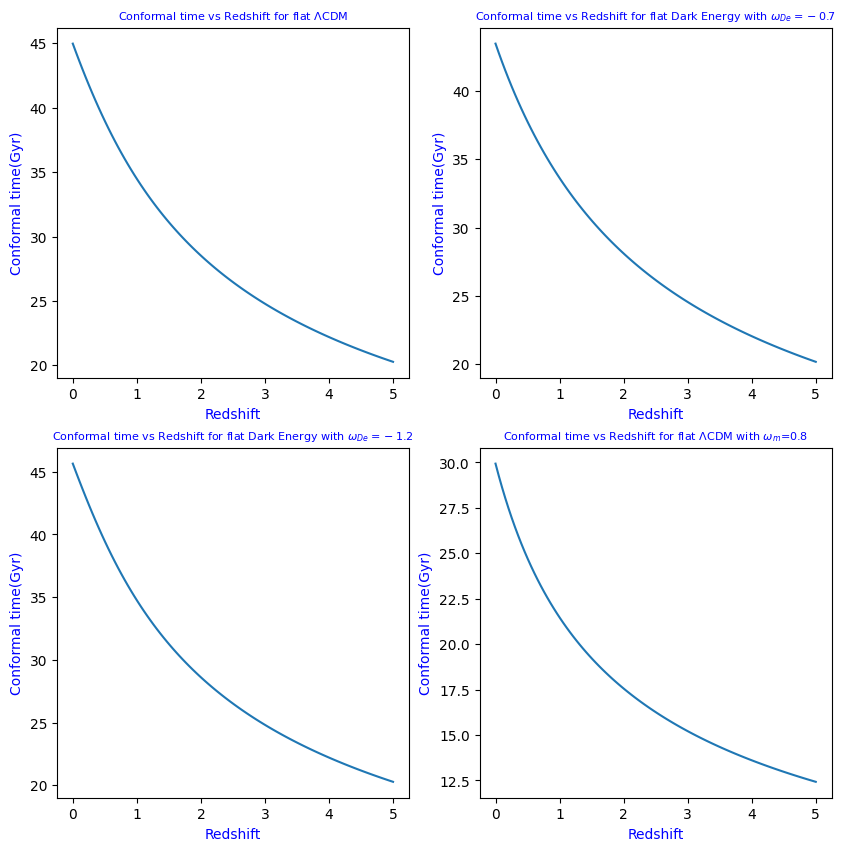

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define cosmological parameters
H0 = 2.33*10**(-18) #sec^-1 1 gyr=3.1536*10^16 sec
H0=2.33*10**(-18)*(3.1536*10**16)
omega_m = 0.3 # Matter density parameter
omega_l = 0.7 # Dark energy density parameter
c=3*10**5
# Define the redshift range
z = np.linspace(0, 5, 100)

# CONFORMAL TIME FOR FLAT LAMBDACDM
def conformal_time(z):
    return (1/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,z,np.inf)[0]))

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(conformal_time(z[i]))


ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel('Conformal time(Gyr)',size=10,color='b')
ax1.set_title("Conformal time vs Redshift for flat $\Lambda$CDM",color='b',size=8)


# CONFORMAL TIME FOR FLAT DARK ENERGY WITH  wde=-0.7
def conformal_time(z):
    return (1/H0*(quad(lambda z:1 /  np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**0.9) ,z,np.inf)[0]))

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(conformal_time(z[i]))


ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel('Conformal time(Gyr)',size=10,color='b')
ax2.set_title("Conformal time vs Redshift for flat Dark Energy with $\omega_{De}=-0.7$",color='b',size=8)


# CONFORMAL TIME FOR FLAT DARK ENERGY WITH  wde=-1.2
def conformal_time(z):
    return (1/H0*(quad(lambda z:1 /  np.sqrt(omega_m * (1 + z) ** 3 + omega_l*(1+z)**(-0.6)) ,z,np.inf)[0]))

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(conformal_time(z[i]))


ax3.plot(z,A)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel('Conformal time(Gyr)',size=10,color='b')
ax3.set_title("Conformal time vs Redshift for flat Dark Energy with $\omega_{De}=-1.2$",color='b',size=8)


# CONFORMAL TIME FOR FLAT LAMBDACDM WITH OMEGAM=0.8
def conformal_time(z):
    return (1/H0*(quad(lambda z:1 / np.sqrt(0.8*(1+z)**3 + 0.2) ,z,np.inf)[0]))

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(conformal_time(z[i]))


ax4.plot(z,A)
ax4.set_xlabel('Redshift',size=10,color='b')
ax4.set_ylabel('Conformal time(Gyr)',size=10,color='b')
ax4.set_title("Conformal time vs Redshift for flat $\Lambda$CDM with $\omega_m$=0.8",color='b',size=8)
plt.show()



# HORIZON SIZE 

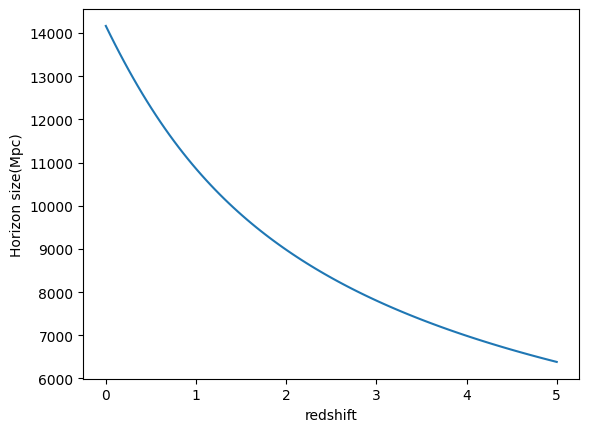

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define cosmological parameters
H0 = 70 # Hubble constant in km/s/Mpc
omega_m = 0.3 # Matter density parameter
omega_l = 0.7 # Dark energy density parameter
c=3*10**5 #km per sec
# Define the redshift range
z = np.linspace(0, 5, 100)

# Calculate the comoving distance for each redshift using the cosmological parameters
def horizon_size(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,z,np.inf)[0]))

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(horizon_size(z[i]))
plt.plot(z,A)
plt.xlabel("redshift")
plt.ylabel("Horizon size(Mpc)")
plt.show()

# AGE OF THE UNIVERSE(PROBLEM 5)

0.8934028876168034
0.8872422145604872
0.8941357393460015
0.547647887421382


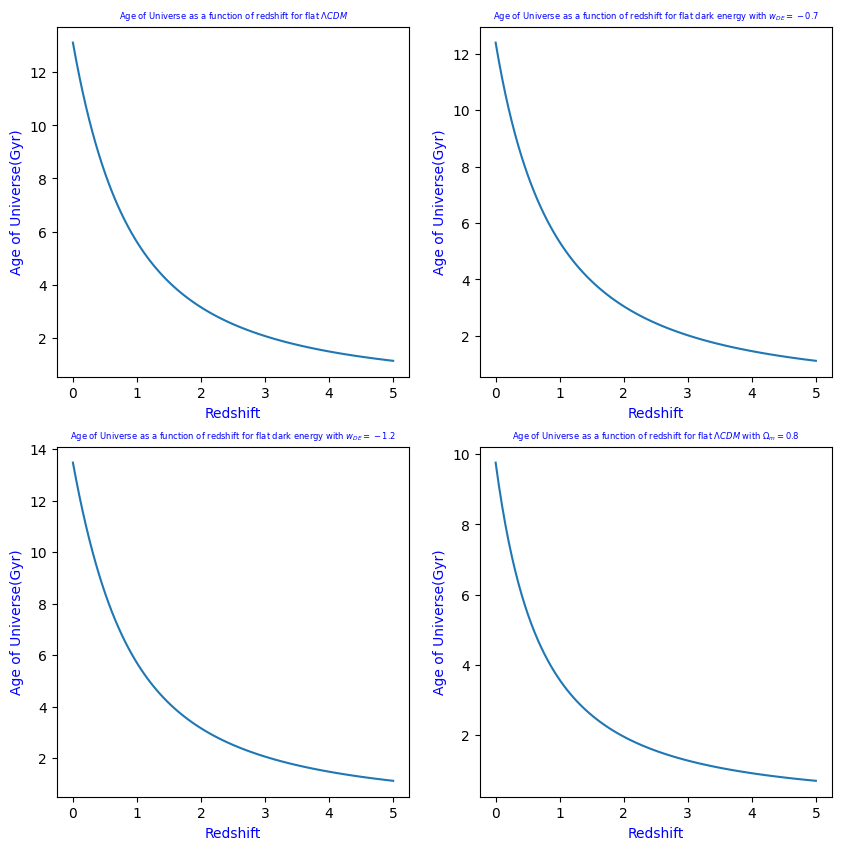

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define cosmological parameters
H0 = 2.33*10**(-18) #sec^-1 1 gyr=3.1536*10^16 sec
H0=2.33*10**(-18)*(3.1536*10**16)
omega_m = 0.3 # Matter density parameter
omega_l = 0.7 # Dark energy density parameter
c=3*10**5
# Define the redshift range
z = np.linspace(0, 5, 100)

# For flat lambda CDM
def ageofuniv(z):
    return (1/H0*(quad(lambda z:1/(1+z) / np.sqrt(omega_m*(1+z)**3 + omega_l) ,z,np.inf)[0]))
print(ageofuniv(6))
# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(ageofuniv(z[i]))

ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel(r'Age of Universe(Gyr)',size=10,color='b')
ax1.set_title("Age of Universe as a function of redshift for flat $\Lambda CDM$",color='b',size=6)


#for flat Dark energy with Wde=-0.7
def ageofuniv(z):
    return (1/H0*(quad(lambda z:1/(1+z) / np.sqrt(omega_m*(1+z)**3 + omega_l*(1+z)**0.9) ,z,np.inf)[0]))
print(ageofuniv(6))
# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(ageofuniv(z[i]))

ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel(r'Age of Universe(Gyr)',size=10,color='b')
ax2.set_title("Age of Universe as a function of redshift for flat dark energy with $w_{DE}=-0.7$",color='b',size=6)


#for flat Dark energy with Wde=-1.2
def ageofuniv(z):
    return (1/H0*(quad(lambda z:1/(1+z) / np.sqrt(omega_m*(1+z)**3 + omega_l*(1+z)**(-0.6)) ,z,np.inf)[0]))
print(ageofuniv(6))
# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(ageofuniv(z[i]))

ax3.plot(z,A)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel(r'Age of Universe(Gyr)',size=10,color='b')
ax3.set_title("Age of Universe as a function of redshift for flat dark energy with $w_{DE}=-1.2$",color='b',size=6)
#for flat LCDM with omegam=0.8
def ageofuniv(z):
    return (1/H0*(quad(lambda z:1/(1+z) / np.sqrt(0.8*(1+z)**3 + 0.2) ,z,np.inf)[0]))
print(ageofuniv(6))
# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(ageofuniv(z[i]))

ax4.plot(z,A)
ax4.set_xlabel('Redshift',size=10,color='b')
ax4.set_ylabel(r'Age of Universe(Gyr)',size=10,color='b')
ax4.set_title("Age of Universe as a function of redshift for flat $\Lambda CDM$ with $\Omega_m=0.8$",color='b',size=6)

plt.show()



# BLACKBODY SPECTRUM (PROBLEM 12)

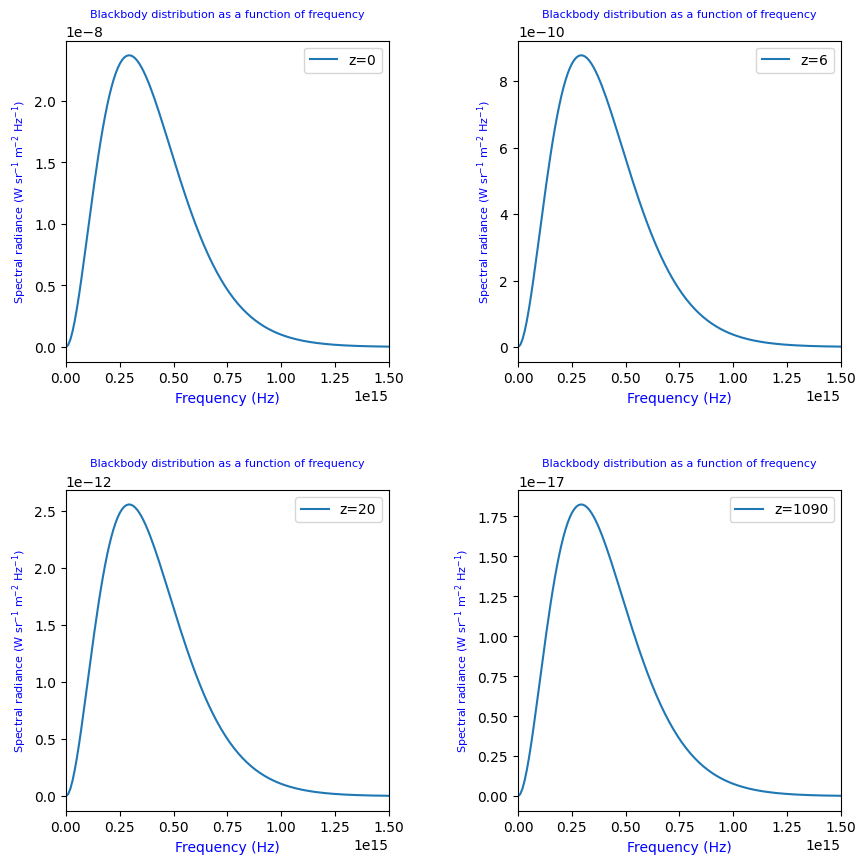

In [4]:
import numpy as np
import pylab as plt

# Constants
h = 6.62607004e-34  # Planck constant
c = 299792458  # Speed of light
k = 1.38064852e-23  # Boltzmann constant
# Temperature in Kelvin
T = 5000
# Frequency range
f_min = 1e12  # 1 THz
f_max = 1e16  # 10 PHz
num_points = 1000
f = np.linspace(f_min, f_max, num_points)
# Blackbody distribution
def B(f,T,z):
    return (2*h*(f/(1+z))**3/c**2)/(np.exp(h*(f*(1+z))/(k*T*(1+z)))-1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# Plot
ax1.plot(f, B(f,5000,0),label=r'z=0')
#plt.plot(f, B(f,5000,6),label=r'z=6')
#plt.plot(f, B(f,5000,20),label=r'z=20')
#plt.plot(f, B(f,5000,1090),label=r'z=1090')
ax1.legend()
ax1.set_xlabel('Frequency (Hz)',color='b',size=10)
ax1.set_ylabel('Spectral radiance (W sr$^{-1}$ m$^{-2}$ Hz$^{-1}$)',color='b',size=8)
ax1.set_title("Blackbody distribution as a function of frequency",color='b',size=8)
ax1.set_xlim(0,1.5e15)

ax2.plot(f, B(f,5000,2),label=r'z=6')
#plt.plot(f, B(f,5000,6),label=r'z=6')
#plt.plot(f, B(f,5000,20),label=r'z=20')
#plt.plot(f, B(f,5000,1090),label=r'z=1090')
ax2.legend()
ax2.set_xlabel('Frequency (Hz)',color='b',size=10)
ax2.set_ylabel('Spectral radiance (W sr$^{-1}$ m$^{-2}$ Hz$^{-1}$)',color='b',size=8)
ax2.set_title("Blackbody distribution as a function of frequency",color='b',size=8)
ax2.set_xlim(0,1.5e15)

ax3.plot(f, B(f,5000,20),label=r'z=20')
#plt.plot(f, B(f,5000,6),label=r'z=6')
#plt.plot(f, B(f,5000,20),label=r'z=20')
#plt.plot(f, B(f,5000,1090),label=r'z=1090')
ax3.legend()
ax3.set_xlabel('Frequency (Hz)',color='b',size=10)
ax3.set_ylabel('Spectral radiance (W sr$^{-1}$ m$^{-2}$ Hz$^{-1}$)',color='b',size=8)
ax3.set_title("Blackbody distribution as a function of frequency",color='b',size=8)
ax3.set_xlim(0,1.5e15)

ax4.plot(f, B(f,5000,1090),label=r'z=1090')
#plt.plot(f, B(f,5000,6),label=r'z=6')
#plt.plot(f, B(f,5000,20),label=r'z=20')
#plt.plot(f, B(f,5000,1090),label=r'z=1090')
ax4.legend()
ax4.set_xlabel('Frequency (Hz)',color='b',size=10)
ax4.set_ylabel('Spectral radiance (W sr$^{-1}$ m$^{-2}$ Hz$^{-1}$)',color='b',size=8)
ax4.set_title("Blackbody distribution as a function of frequency",color='b',size=8)
ax4.set_xlim(0,1.5e15)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()






# PROBLEM10

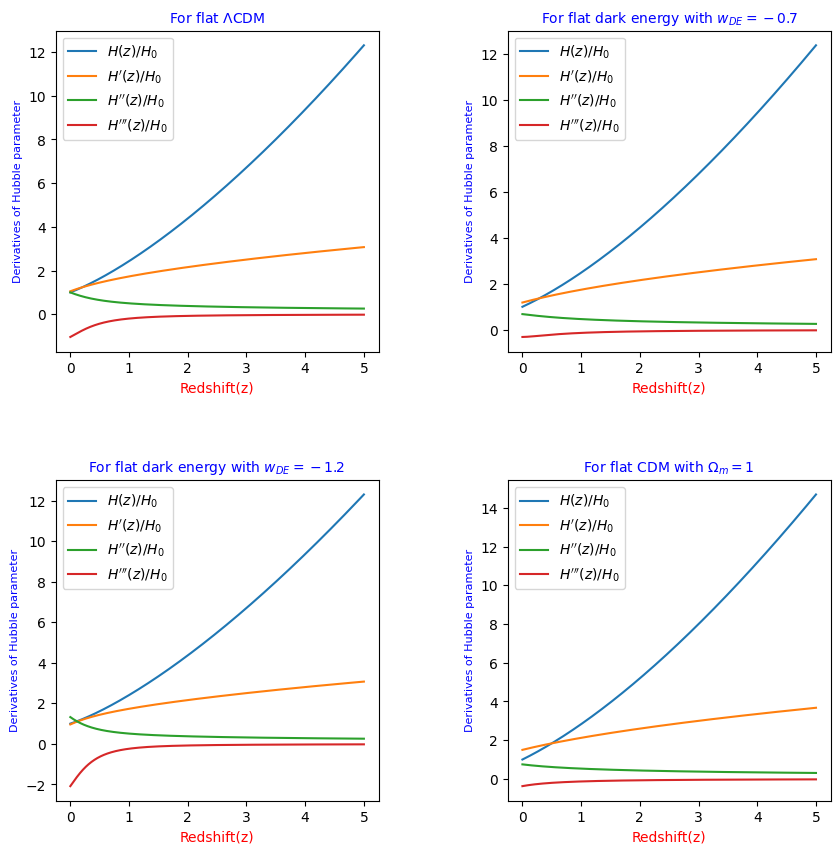

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
#FOR FLAT LAMBDA CDM 
z = sp.symbols('x')
wm=0.7
wl=0.3
# Define the function f(x)
h =(wm*(1+z)**3+wl)**(1/2) #sp.sin(x)#sp.sin(x**2) / (1 + x**2)

# Compute the derivative of f(x)
f_prime = sp.diff(h, z)
f_prime2=sp.diff(h, z,2)
f_prime3=sp.diff(h, z,3)
# Convert f(x) to a Python function
f_func = sp.lambdify(z, h)
# Convert f'(x) to a Python function
f_prime_func = sp.lambdify(z, f_prime)
f_prime2_func = sp.lambdify(z, f_prime2)
f_prime3_func = sp.lambdify(z, f_prime3)
z_values = np.linspace(0, 5, 1000)
y_values = f_func(z_values)
y_prime_values = f_prime_func(z_values)
y_prime2_values = f_prime2_func(z_values)
y_prime3_values = f_prime3_func(z_values)
ax1.plot(z_values, y_values, label='$H(z)/H_0$')
ax1.plot(z_values, y_prime_values, label="$H'(z)/H_0$")
ax1.plot(z_values, y_prime2_values, label="$H''(z)/H_0$")
ax1.plot(z_values, y_prime3_values, label="$H'''(z)/H_0$")
ax1.set_xlabel("Redshift(z)",color='r',size='10')
ax1.set_ylabel("Derivatives of Hubble parameter",color='b',size='8')
ax1.set_title("For flat $\Lambda$CDM",color='b',size='10')
ax1.legend()


#FOR FLAT DARK ENERGY WITH WDE=-0.7
h =(wm*(1+z)**3+wl*(1+z)**0.9)**(1/2) #sp.sin(x)#sp.sin(x**2) / (1 + x**2)

# Compute the derivative of f(x)
f_prime = sp.diff(h, z)
f_prime2=sp.diff(h, z,2)
f_prime3=sp.diff(h, z,3)
# Convert f(x) to a Python function
f_func = sp.lambdify(z, h)
# Convert f'(x) to a Python function
f_prime_func = sp.lambdify(z, f_prime)
f_prime2_func = sp.lambdify(z, f_prime2)
f_prime3_func = sp.lambdify(z, f_prime3)
z_values = np.linspace(0, 5, 1000)
y_values = f_func(z_values)
y_prime_values = f_prime_func(z_values)
y_prime2_values = f_prime2_func(z_values)
y_prime3_values = f_prime3_func(z_values)
ax2.plot(z_values, y_values, label='$H(z)/H_0$')
ax2.plot(z_values, y_prime_values, label="$H'(z)/H_0$")
ax2.plot(z_values, y_prime2_values, label="$H''(z)/H_0$")
ax2.plot(z_values, y_prime3_values, label="$H'''(z)/H_0$")
ax2.set_xlabel("Redshift(z)",color='r',size='10')
ax2.set_ylabel("Derivatives of Hubble parameter",color='b',size='8')
ax2.set_title("For flat dark energy with $w_{DE}=-0.7$",color='b',size='10')
ax2.legend()


#FOR FLAT DARK ENERGY WITH WDE=-1.2
h =(wm*(1+z)**3+wl*(1+z)**(-0.6))**(1/2) #sp.sin(x)#sp.sin(x**2) / (1 + x**2)

# Compute the derivative of f(x)
f_prime = sp.diff(h, z)
f_prime2=sp.diff(h, z,2)
f_prime3=sp.diff(h, z,3)
# Convert f(x) to a Python function
f_func = sp.lambdify(z, h)
# Convert f'(x) to a Python function
f_prime_func = sp.lambdify(z, f_prime)
f_prime2_func = sp.lambdify(z, f_prime2)
f_prime3_func = sp.lambdify(z, f_prime3)
z_values = np.linspace(0, 5, 1000)
y_values = f_func(z_values)
y_prime_values = f_prime_func(z_values)
y_prime2_values = f_prime2_func(z_values)
y_prime3_values = f_prime3_func(z_values)
ax3.plot(z_values, y_values, label='$H(z)/H_0$')
ax3.plot(z_values, y_prime_values, label="$H'(z)/H_0$")
ax3.plot(z_values, y_prime2_values, label="$H''(z)/H_0$")
ax3.plot(z_values, y_prime3_values, label="$H'''(z)/H_0$")
ax3.set_xlabel("Redshift(z)",color='r',size='10')
ax3.set_ylabel("Derivatives of Hubble parameter",color='b',size='8')
ax3.set_title("For flat dark energy with $w_{DE}=-1.2$",color='b',size='10')
ax3.legend()


#FOR FLAT DARK ENERGY WITH wm=1
h =((1+z)**3)**(1/2) #sp.sin(x)#sp.sin(x**2) / (1 + x**2)

# Compute the derivative of f(x)
f_prime = sp.diff(h, z)
f_prime2=sp.diff(h, z,2)
f_prime3=sp.diff(h, z,3)
# Convert f(x) to a Python function
f_func = sp.lambdify(z, h)
# Convert f'(x) to a Python function
f_prime_func = sp.lambdify(z, f_prime)
f_prime2_func = sp.lambdify(z, f_prime2)
f_prime3_func = sp.lambdify(z, f_prime3)
z_values = np.linspace(0, 5, 1000)
y_values = f_func(z_values)
y_prime_values = f_prime_func(z_values)
y_prime2_values = f_prime2_func(z_values)
y_prime3_values = f_prime3_func(z_values)
ax4.plot(z_values, y_values, label='$H(z)/H_0$')
ax4.plot(z_values, y_prime_values, label="$H'(z)/H_0$")
ax4.plot(z_values, y_prime2_values, label="$H''(z)/H_0$")
ax4.plot(z_values, y_prime3_values, label="$H'''(z)/H_0$")
ax4.set_xlabel("Redshift(z)",color='r',size='10')
ax4.set_ylabel("Derivatives of Hubble parameter",color='b',size='8')
ax4.set_title("For flat CDM with $\Omega_m=1$",color='b',size='10')
ax4.legend()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

# Problem 11

Enter the value of w_add:     0.66


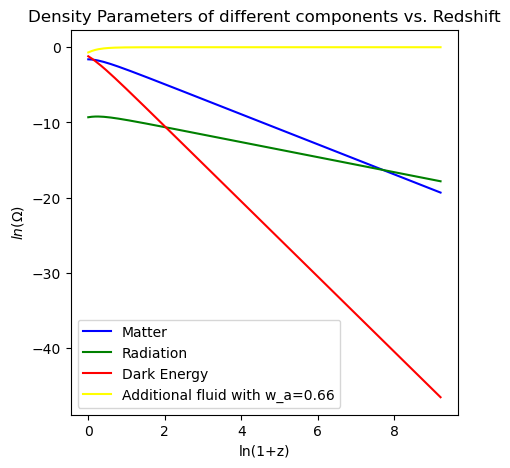

In [4]:
import numpy as np
import matplotlib.pyplot as plt

w_a=float(input("Enter the value of w_add:     "))
O_m0 = 0.2
O_r0 = 9e-5
O_d0 = 0.3
O_a0 = 0.5
z = np.linspace(1e-6, 10000, int(1e+5))

if w_a == 0.66:
    O_m = O_m0*((1+z)**3)/(O_m0*((1+z)**3) +  O_r0*((1+z)**4) + O_a0*((1+z)**5) + O_d0)
    O_r = O_r0*((1+z)**4)/(O_m0*((1+z)**3) +  O_r0*((1+z)**4) + O_a0*((1+z)**5) + O_d0)
    O_a1 = O_a0*((1+z)**5)/(O_m0*((1+z)**3) +  O_r0*((1+z)**4) + O_a0*((1+z)**5) + O_d0)
    O_d = O_d0/(O_m0*((1+z)**3) +  O_r0*((1+z)**4) + O_a0*((1+z)**5) + O_d0)
    
elif w_a == 1:
    O_m = O_m0*((1+z)**3)/(O_m0*((1+z)**3) +  O_r0*((1+z)**4) + O_a0*((1+z)**6) + O_d0)
    O_r = O_r0*((1+z)**4)/(O_m0*((1+z)**3) +  O_r0*((1+z)**4) + O_a0*((1+z)**6) + O_d0)
    O_a2 = O_a0*((1+z)**6)/(O_m0*((1+z)**3) +  O_r0*((1+z)**4) + O_a0*((1+z)**6) + O_d0)
    O_d = O_d0/(O_m0*((1+z)**3) +  O_r0*((1+z)**4) + O_a0*((1+z)**6) + O_d0)

else:
    print("Invalid value of w_a. Please enter either 2/3 or 1.")
    exit()

plt.figure(figsize=(5,5))
plt.plot(np.log(1+z), np.log(O_m), color='blue', label='Matter')
plt.plot(np.log(1+z), np.log(O_r), color='green', label='Radiation')
plt.plot(np.log(1+z), np.log(O_d), color='red', label='Dark Energy')
if w_a == 2/3:
    plt.plot(np.log(1+z), np.log(O_a1), color='yellow', label='Additional fluid fluid with w_a={:.2f}'.format(w_a))
else:
    plt.plot(np.log(1+z), np.log(O_a2), color='yellow', label='Additional fluid with w_a={:.2f}'.format(w_a))

plt.xlabel('ln(1+z)')
plt.ylabel(r'$ln(\Omega)$')
plt.title('Density Parameters of different components vs. Redshift')
plt.legend()
plt.savefig('Problem_11 for w_a={:.2f}.png'.format(w_a))





# PROBLEM 13

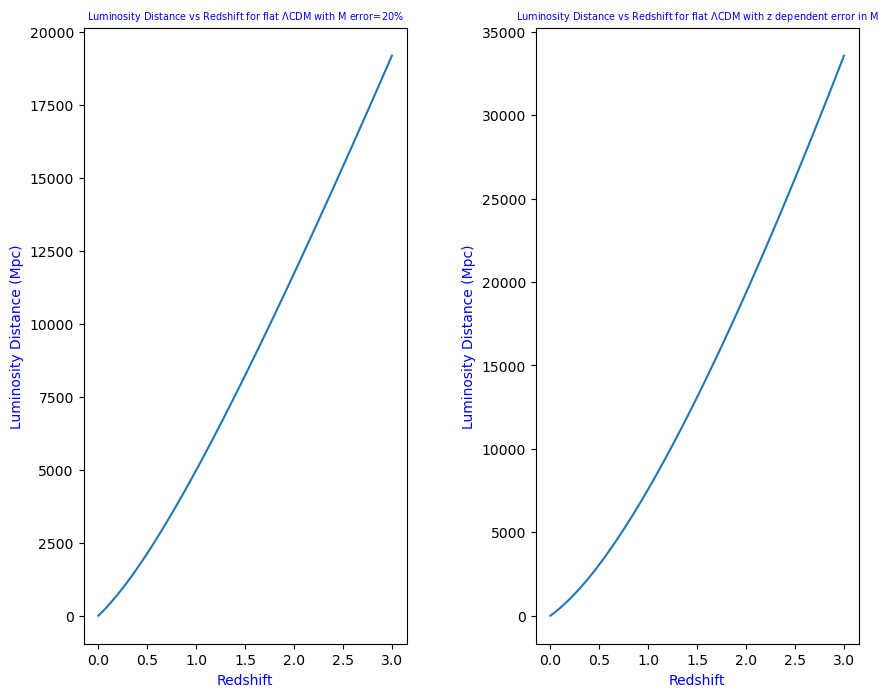

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Define cosmological parameters
H0 = 70 # Hubble constant in km/s/Mpc
omega_m = 0.3 # Matter density parameter
omega_l = 0.7 # Dark energy density parameter
c=3*10**5
# Define the redshift range
z = np.linspace(0, 3, 100)

# Calculate the Luminosity distance for flat lambda CDM with M error=20%
def modified_luminosity_distance(z):
    return 0.7543*c/H0*(1+z)*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,0,z)[0])

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(modified_luminosity_distance(z[i]))

ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel('Luminosity Distance (Mpc)',size=10,color='b')
ax1.set_title("Luminosity Distance vs Redshift for flat $\Lambda$CDM with M error=20%",color='b',size=7)

# Calculate the Luminosity distance for flat lambda CDM with redshift dependent error in M
def modified_luminosity_distance(z):
    return (1+z)**0.2*c/H0*(1+z)*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,0,z)[0])

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(modified_luminosity_distance(z[i]))

ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel('Luminosity Distance (Mpc)',size=10,color='b')
ax2.set_title("Luminosity Distance vs Redshift for flat $\Lambda$CDM with z dependent error in M",color='b',size=7)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()


# Plotting Age of the Universe,Lookback-Time, Conformal Time for TCMB=100K

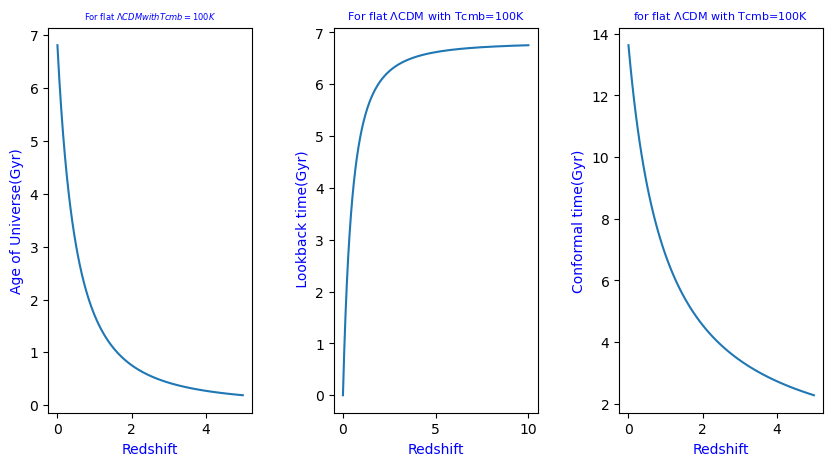

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Define cosmological parameters
H0 = 2.33*10**(-18) #sec^-1 1 gyr=3.1536*10^16 sec
H0=2.33*10**(-18)*(3.1536*10**16)
omega_m = 0.0018 # Matter density parameter
omega_l = 0.0103 # Dark energy density parameter
omega_r=0.9939   # Radiation energy density parameter

c=3*10**5
# Define the redshift range
z = np.linspace(0, 5, 100)

# For flat lambda CDM
def ageofuniv(z):
    return (1/H0*(quad(lambda z:1/(1+z) / np.sqrt(omega_m*(1+z)**3 + omega_l + omega_r*(1+z)**4) ,z,np.inf)[0]))

A=[]
for i in range(len(z)):
    A.append(ageofuniv(z[i]))

ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel(r'Age of Universe(Gyr)',size=10,color='b')
ax1.set_title("For flat $\Lambda CDM with Tcmb=100K$",color='b',size=6)

# Calculate the lookback time as a function of redshift for flat lambda cdm
def lookbacktime(z):
    integral,error = quad(lambda z: 1 / (1 + z) / np.sqrt(omega_m * (1 + z) ** 3 + omega_l + omega_r*(1+z)**4)/H0 , 0,z)#we integrate from the point zd
    return integral
# Create the plot
A1=[]
Z = np.linspace(0, 10, 1000)
for i in range(len(Z)):
    A1.append(lookbacktime(Z[i]))

ax2.plot(Z,A1)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel(' Lookback time(Gyr)',size=10,color='b')
ax2.set_title("For flat $\Lambda$CDM with Tcmb=100K",color='b',size=8)



# CONFORMAL TIME FOR FLAT LAMBDACDM
def conformal_time(z):
    return (1/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l + omega_r*(1+z)**4) ,z,np.inf)[0]))

# Plot the comoving distance vs redshift
A=[]
for i in range(len(z)):
    A.append(conformal_time(z[i]))


ax3.plot(z,A)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel('Conformal time(Gyr)',size=10,color='b')
ax3.set_title("for flat $\Lambda$CDM with Tcmb=100K",color='b',size=8)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig('time.png')


# Plotting Luminosity Destance,Comoving Distance,Angular Diameter Distance and Horizon Size for Tcmb=100K

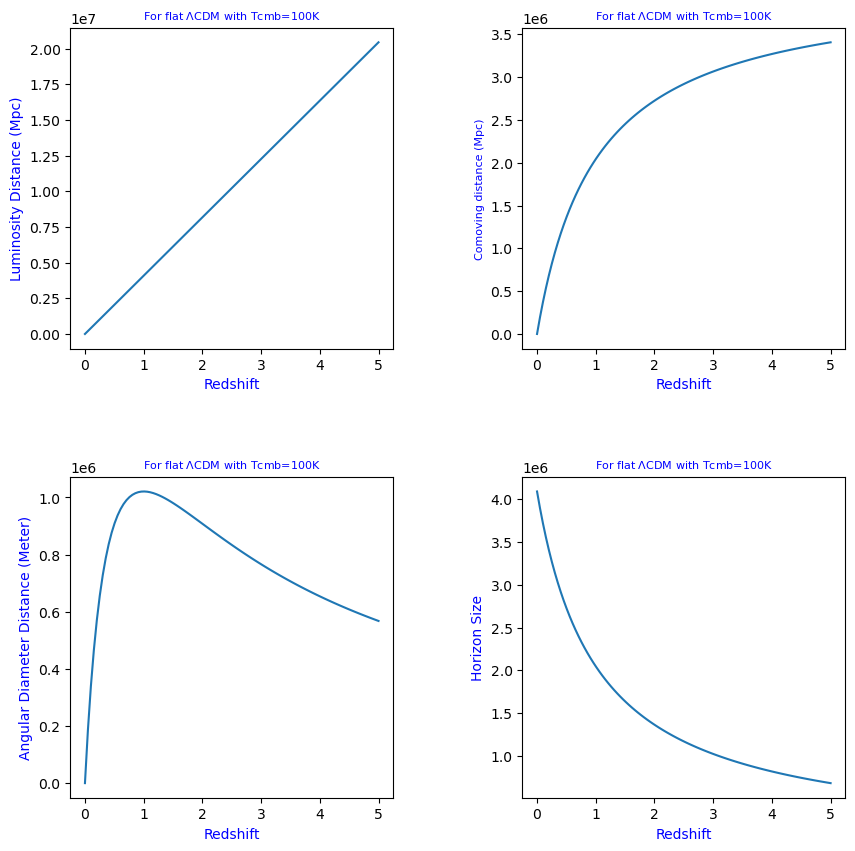

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define cosmological parameters
H0 = 2.33*10**(-18) #sec^-1 1 gyr=3.1536*10^16 sec
H0=2.33*10**(-18)*(3.1536*10**16)
omega_m = 0.0018 # Matter density parameter
omega_l = 0.0103 # Dark energy density parameter
omega_r=0.9939   # Radiation energy density parameter

c=3*10**5
# Define the redshift range
z = np.linspace(0, 5, 100)


# Calculate the Luminosity distance for flat lambda CDM
def luminosity_distance(z):
    return c/H0*(1+z)*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l + omega_r*(1+z)**4) ,0,z)[0])

# Plot the Luminosity Distance vs redshift
A=[]
for i in range(len(z)):
    A.append(luminosity_distance(z[i]))

ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel('Luminosity Distance (Mpc)',size=10,color='b')
ax1.set_title("For flat $\Lambda$CDM with Tcmb=100K",color='b',size=8)

# comoving distance for flat Lambda CDM
def comoving_distance(z):
    return c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l + omega_r*(1+z)**4) ,0,z)[0])

A=[]
for i in range(len(z)):
    A.append(comoving_distance(z[i]))
ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel('Comoving distance (Mpc)',size=8,color='b')
ax2.set_title("For flat $\Lambda$CDM with Tcmb=100K",color='b',size=8)

# ANGULAR DIAMETER DISTANCE  FOR FLAT LAMBDA CDM           
def l(z):
    integral,error = quad(lambda z: 1 / np.sqrt(omega_m * (1 + z) ** 3 + omega_l + omega_r*(1+z)**4)/H0 , 0,z)#we integrate from the point zd
    return integral
def luminositydist(z):
    return c*(1+z)*l(z)
def angulardiadist(z):
    return luminositydist(z)/(1+z)**2


# Plot the  Angular Diameter  distance vs redshift
A=[]
for i in range(len(z)):
    A.append(angulardiadist(z[i]))

ax3.plot(z,A)
ax3.set_xlabel('Redshift',size=10,color='b')
ax3.set_ylabel('Angular Diameter Distance (Meter)',size=10,color='b')
ax3.set_title("For flat $\Lambda$CDM with Tcmb=100K",color='b',size=8)

# Calculate the comoving distance for each redshift using the cosmological parameters
def horizon_size(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l + omega_r*(1+z)**4) ,z,np.inf)[0]))

# Plot the Horizon size vs redshift
A=[]
for i in range(len(z)):
    A.append(horizon_size(z[i]))
    
ax4.plot(z,A)
ax4.set_xlabel('Redshift',size=10,color='b')
ax4.set_ylabel('Horizon Size',size=10,color='b')
ax4.set_title("For flat $\Lambda$CDM with Tcmb=100K",color='b',size=8)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig('distance.png')



# Plotting Comoving Volume and Proper Volume for Tcmb=100K 

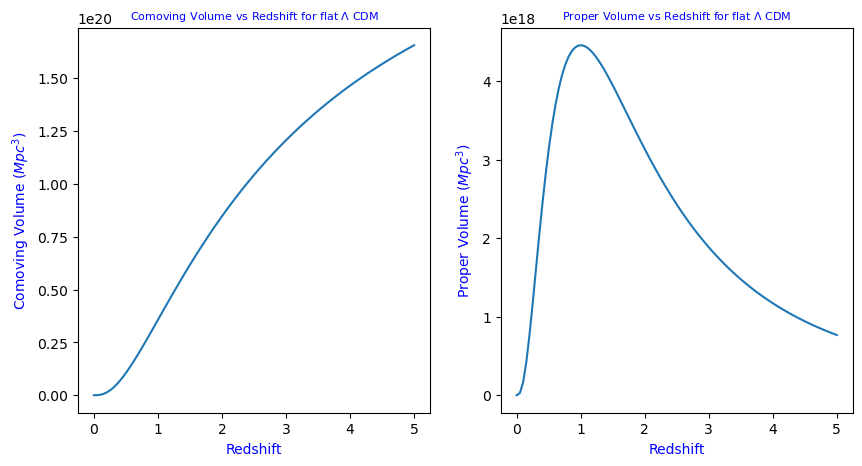

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Define cosmological parameters
H0 = 2.33*10**(-18) #sec^-1 1 gyr=3.1536*10^16 sec
H0=2.33*10**(-18)*(3.1536*10**16)
omega_m = 0.0018 # Matter density parameter
omega_l = 0.0103 # Dark energy density parameter
omega_r=0.9939   # Radiation energy density parameter

c=3*10**5
# Define the redshift range
z = np.linspace(0, 5, 100)

# Calculate the comoving Volume for flat lambda  CDM 
def comoving_volume(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l + omega_r*(1+z)**4) ,0,z)[0]))**3*4/3*np.pi

# Plot the comoving volume vs redshift
A=[]
for i in range(len(z)):
    A.append(comoving_volume(z[i]))

ax1.plot(z,A)
ax1.set_xlabel('Redshift',size=10,color='b')
ax1.set_ylabel('Comoving Volume $(Mpc^3)$',size=10,color='b')
ax1.set_title("Comoving Volume vs Redshift for flat $\Lambda$ CDM",color='b',size=8)

# Calculate the proper volume for flat lambda  CDM 
def proper_volume(z):
    return (c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l + omega_r*(1+z)**4) ,0,z)[0]))**3*4/3*np.pi*(1+z)**(-3)

A=[]
for i in range(len(z)):
    A.append(proper_volume(z[i]))

ax2.plot(z,A)
ax2.set_xlabel('Redshift',size=10,color='b')
ax2.set_ylabel('Proper Volume $(Mpc^3)$',size=10,color='b')
ax2.set_title("Proper Volume vs Redshift for flat $\Lambda$ CDM",color='b',size=8)

plt.savefig('volume.png')


# Evolution of Scale factor and Blackbody Spectrum for Flat Lambda-CDM with Tcmb=100K

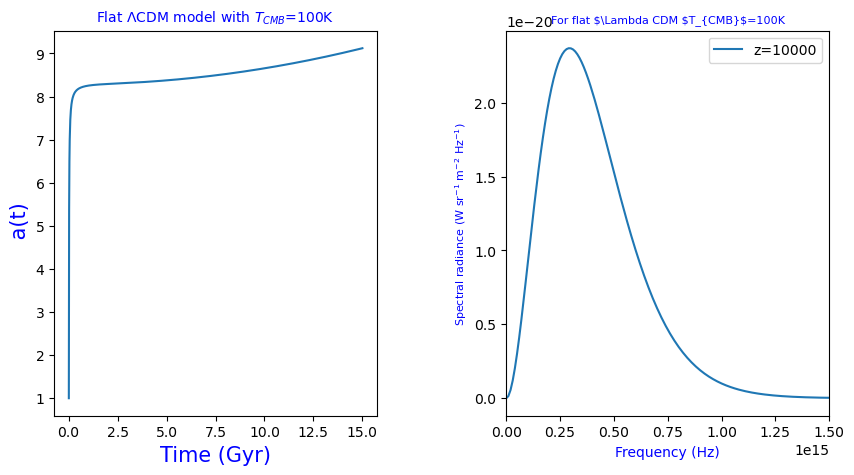

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Define cosmological parameters
H0 = 2.33*10**(-18) #sec^-1 1 gyr=3.1536*10^16 sec
H0=2.33*10**(-18)*(3.1536*10**16)
omega_m = 0.0018 # Matter density parameter
omega_l = 0.0103 # Dark energy density parameter
omega_r=0.9939   # Radiation energy density parameter

# Constants
h = 6.62607004e-34  # Planck constant
c = 299792458  # Speed of light
k = 1.38064852e-23  # Boltzmann constant
# Temperature in Kelvin
T = 5000
# Frequency range
f_min = 1e7  # 10 MHz
f_max = 1e16  # 10 PHz
num_points = 1000
f = np.linspace(f_min, f_max, num_points)
# Blackbody distribution
def B(f,T,z):
    return (2*h*(f/(1+z))**3/c**2)/(np.exp(h*(f*(1+z))/(k*T*(1+z)))-1)


def func(da,a):
    return H0 * np.sqrt(omega_m/a + omega_l*a**2 + omega_r/a**4)
# Initial condition: a(t0) = 1, where t0 is the present time
a0 = 1
# Time array: from present time to 15 billion years ago, in units of Gyr
t = np.linspace(0.01, 15, 1000)
a = odeint(func, a0, t)
ax1.plot(t,a)
ax1.set_xlabel('Time (Gyr)',size=15,color='b')
ax1.set_ylabel(' a(t)',size=15,color='b')
ax1.set_title(r'Flat ΛCDM model with $T_{CMB}$=100K',size=10,color='b')

ax2.plot(f, B(f,5000,10000),label=r'z=10000')
ax2.legend()
ax2.set_xlabel('Frequency (Hz)',color='b',size=10)
ax2.set_ylabel('Spectral radiance (W sr$^{-1}$ m$^{-2}$ Hz$^{-1}$)',color='b',size=8)
ax2.set_title("For flat $\Lambda CDM $T_{CMB}$=100K",color='b',size=8)
ax2.set_xlim(0,1.5e15)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig('blackbody_scale.png')
